![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [2]:
def preval(c, r, t):

    return c/(1+r)**t

cashflow = 100
intrate = 0.03
time = 10

pv = preval(cashflow, intrate, time)
print("The present value of C{} at rate {} is: {:.2f}".format(time, intrate, pv))


The present value of C10 at rate 0.03 is: 74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

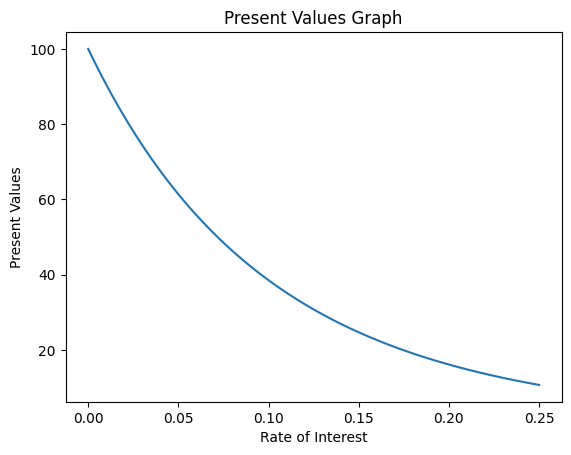

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rate = np.linspace(0,0.25,100)
preint = [preval(100, i, 10) for i in rate]

plt.plot(rate, preint)
plt.xlabel("Rate of Interest")
plt.ylabel("Present Values")
plt.title("Present Values Graph")
plt.show()


### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [4]:
cashflows = [10,10,110]
time = [1,2,3]
rate = 0.05

for i in time:
    pv = preval(cashflows[i-1], rate, i)
    print("Present value for Year {}: {:.2f}".format(i, pv))

Present value for Year 1: 9.52
Present value for Year 2: 9.07
Present value for Year 3: 95.02


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [5]:
import pandas as pd
prices = pd.read_csv("02_python_data.csv", index_col=0, parse_dates=True)
returns = prices.pct_change()
logreturns = np.log(prices) - np.log(prices.shift(1))


display(prices.head(5))
display(returns.head(5))
display(logreturns.head(5))

,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,14097.88,97.026932,117.78,17.570,105.50,216.20,67.10,148.94,78.51,51.26,...,66.02,55.26,193.65,6.282,214.8,73.94,37.83,44.04,79.54,41.29
2022-05-02,13939.07,95.982669,115.12,17.290,103.96,215.00,62.22,147.22,77.64,50.22,...,62.46,54.74,187.90,6.204,211.6,72.30,37.74,44.01,77.48,41.41
2022-05-03,14039.47,94.729554,114.56,17.376,106.44,217.00,62.88,150.20,79.98,50.42,...,64.32,55.22,197.10,6.412,222.4,72.18,38.07,44.06,79.58,39.40
2022-05-04,13970.82,92.979171,115.78,17.530,102.68,213.55,62.33,148.52,79.47,51.98,...,63.30,55.42,192.30,6.310,213.1,72.48,37.15,43.34,78.32,40.20
2022-05-05,13902.52,94.699718,116.58,17.592,108.96,199.76,61.00,147.18,78.03,53.06,...,60.54,54.18,189.95,6.188,211.0,71.34,33.21,44.05,77.78,38.75


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,-0.011265,-0.010763,-0.022584,-0.015936,-0.014597,-0.005550,-0.072727,-0.011548,-0.011081,-0.020289,...,-0.053923,-0.009410,-0.029693,-0.012416,-0.014898,-0.022180,-0.002379,-0.000681,-0.025899,0.002906
2022-05-03,0.007203,-0.013056,-0.004864,0.004974,0.023855,0.009302,0.010608,0.020242,0.030139,0.003982,...,0.029779,0.008769,0.048962,0.033527,0.051040,-0.001660,0.008744,0.001136,0.027104,-0.048539
2022-05-04,-0.004890,-0.018478,0.010649,0.008863,-0.035325,-0.015899,-0.008747,-0.011185,-0.006377,0.030940,...,-0.015858,0.003622,-0.024353,-0.015908,-0.041817,0.004156,-0.024166,-0.016341,-0.015833,0.020305
2022-05-05,-0.004889,0.018505,0.006910,0.003537,0.061161,-0.064575,-0.021338,-0.009022,-0.018120,0.020777,...,-0.043602,-0.022375,-0.012220,-0.019334,-0.009855,-0.015728,-0.106057,0.016382,-0.006895,-0.036070


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,-0.011329,-0.010821,-0.022843,-0.016065,-0.014705,-0.005566,-0.075508,-0.011615,-0.011143,-0.020497,...,-0.055431,-0.009455,-0.030142,-0.012494,-0.015010,-0.022430,-0.002382,-0.000681,-0.026240,0.002902
2022-05-03,0.007177,-0.013142,-0.004876,0.004962,0.023575,0.009259,0.010552,0.020040,0.029694,0.003975,...,0.029344,0.008731,0.047801,0.032977,0.049780,-0.001661,0.008706,0.001135,0.026743,-0.049757
2022-05-04,-0.004902,-0.018651,0.010593,0.008824,-0.035964,-0.016026,-0.008785,-0.011248,-0.006397,0.030471,...,-0.015985,0.003615,-0.024655,-0.016036,-0.042716,0.004148,-0.024463,-0.016476,-0.015960,0.020101
2022-05-05,-0.004901,0.018336,0.006886,0.003531,0.059363,-0.066754,-0.021569,-0.009063,-0.018286,0.020564,...,-0.044581,-0.022629,-0.012296,-0.019524,-0.009903,-0.015853,-0.112113,0.016249,-0.006919,-0.036736


### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

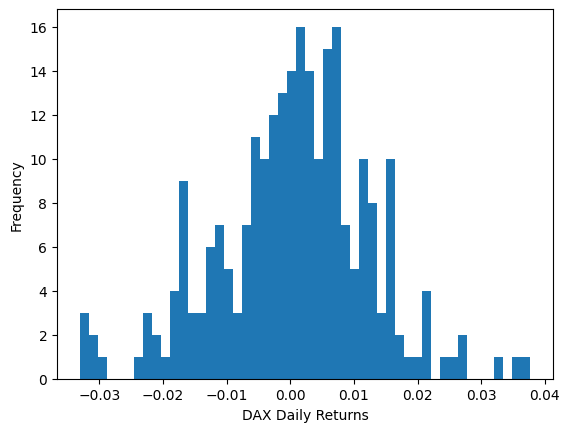

In [6]:
t = returns[".GDAXI"]

plt.hist(t, bins = 50)
plt.xlabel("DAX Daily Returns")
plt.ylabel("Frequency")
plt.show()

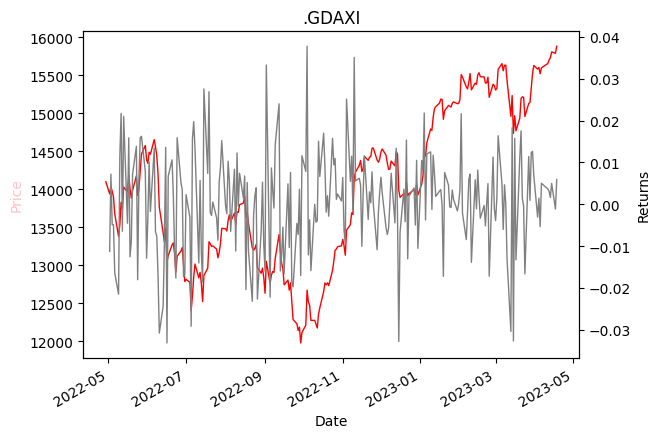

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

prices[".GDAXI"].plot(ax=ax1, color = 'red', linewidth = 1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Price", color = 'pink')

returns[".GDAXI"].plot(ax = ax2, color = 'grey', linewidth = 1)
ax2.set_xlabel("Date")
ax2.set_ylabel("Returns")

plt.title(".GDAXI")
plt.show()

### Task:

Which company had the highest average stock return during the time period covered by the data?

In [8]:
maxlogreturn = max(logreturns.mean())
logreturns.mean()[logreturns.mean() == maxlogreturn]


CBKG.DE    0.001999
dtype: float64

### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

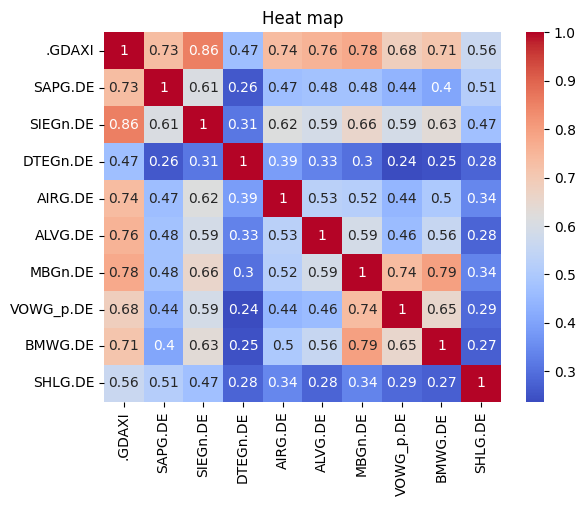

In [9]:
import seaborn as sns
correlationmatrix = returns.iloc[:,:10].corr()
sns.heatmap(correlationmatrix, cmap='coolwarm', annot=True)
plt.title("Heat map")
plt.show()

### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

In [15]:
correlationmatrix = returns.corr()
correlationmatrix = correlationmatrix.unstack()
correlationmatrix = correlationmatrix.sort_values()
display(correlationmatrix[correlationmatrix != 1])


[0.013871935085845654,
 0.013871935085845654,
 0.018490052598726027,
 0.018490052598726027,
 0.02200141143803354,
 0.02200141143803354,
 0.03876246742465325,
 0.03876246742465325,
 0.046300336577419596,
 0.046300336577419596,
 0.054273281771237185,
 0.054273281771237185,
 0.07285863698484418,
 0.07285863698484418,
 0.07567651113442779,
 0.07567651113442779,
 0.07647545924517846,
 0.07647545924517846,
 0.07718256205714567,
 0.07718256205714567,
 0.07833428481937657,
 0.07833428481937657,
 0.08198346876884494,
 0.08198346876884494,
 0.08236024921020331,
 0.08236024921020331,
 0.08505318740590992,
 0.08505318740590992,
 0.08973722296493873,
 0.08973722296493873,
 0.09371075093964322,
 0.09371075093964322,
 0.09649685875982382,
 0.09649685875982382,
 0.09657123891983374,
 0.09657123891983374,
 0.09906024614319563,
 0.09906024614319563,
 0.10360699100119046,
 0.10360699100119046,
 0.10418396762125594,
 0.10418396762125594,
 0.10479448510973369,
 0.10479448510973369,
 0.105236504520682,
 0.1

### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html